In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

Solving $ y'' + 4y' + 2y = 0 $ over the range $x\in[0,5]$ with initial conditions $y(0) = 2$ and $y'(0) = 0$. We start by rewriting this as a system of two first order differential equations, letting $y(x)$ be itself and $y'(x) = z(x)$. Then:
\begin{align*}
    \begin{bmatrix}
        y'(x) \\ z'(x)
    \end{bmatrix}
    =
    \begin{bmatrix}
        z(x) \\ -4z(x) - 2y(x)
    \end{bmatrix}
\end{align*}
with $y(0) = 2$ and $z(0)=0$. So now we have a vector valued function, call it $\vec{F}(x) = \begin{bmatrix} y \\ z \end{bmatrix}$, that we can solve with typical forward Euler, as given below:
$$ \vec{F}_{i+1} = \vec{F}_i + h\vec{F}'(x_i, \vec{F}_i) $$

In [28]:
def F_prime(F):
    y = F[0]
    z = F[1]

    return np.array([z, -4*z - 2*y])

def euler(x_init, x_final, F_prime, F_init, h):
    F_i = F_init
    x_i = x_init

    y_arr = [F_i[0]]
    
    while x_i < x_final:
        F_i = F_i + h*F_prime(F_i)
        y_arr.append(F_i[0])

        x_i += h

    return np.array(y_arr)


In [29]:
F_init = np.array([2,0])

y_for_deci_h =  euler(0, 5, F_prime, F_init, 0.1)
y_for_centi_h = euler(0, 5, F_prime, F_init, 0.01)
y_for_milli_h = euler(0, 5, F_prime, F_init, 0.001)

y = lambda x : 2*np.exp(-x) * (np.cos(np.sqrt(3) * x) + np.sin(np.sqrt(3) * x) / np.sqrt(3) )

In [30]:
x_range = np.linspace(0,5,501)
y_true = y(x_range)

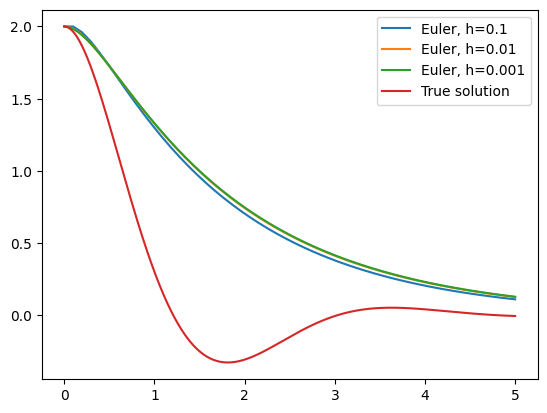

In [33]:
plt.plot(np.linspace(0,5, len(y_for_deci_h)), y_for_deci_h, label='Euler, h=0.1')
plt.plot(np.linspace(0,5, len(y_for_centi_h)), y_for_centi_h, label='Euler, h=0.01')
plt.plot(np.linspace(0,5, len(y_for_milli_h)), y_for_milli_h, label='Euler, h=0.001')
plt.plot(x_range, y_true, label='True solution')
plt.legend()
plt.show()

# Problem 2